In [87]:
import cv2
from google.colab.patches import cv2_imshow

In [70]:
image = cv2.imread("/content/test_with_triangles.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

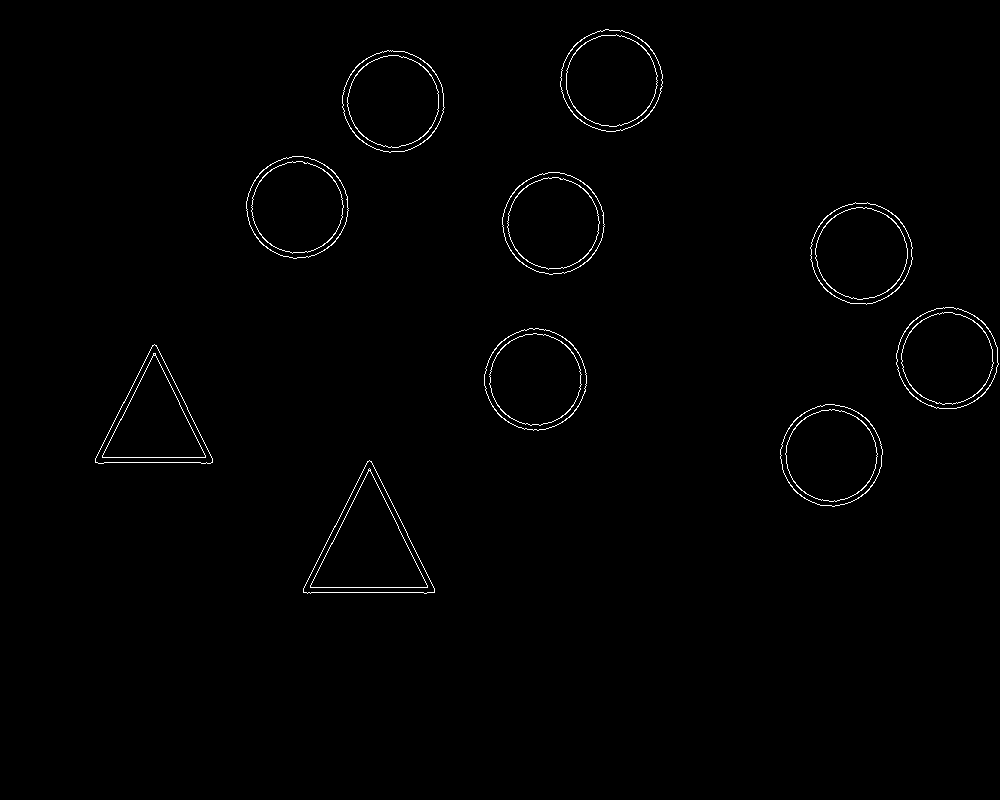

In [71]:
cv2_imshow(edges)

In [72]:
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

In [ ]:
 cards_coordinates = {}
    for i in range(0, len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        if w > 20 and h > 30:
            img1 = image[y:y+h,x:x+w]
            #cards_name = find_features(img_crop)
            #cards_coordinates[cards_name] = (x - 15, y - 15, x + w + 15, y + h + 15)
            

In [73]:
x, y, w, h = cv2.boundingRect(contours[1])
img1 = image[y - 20:y + h + 20, x - 20:x + w + 20]

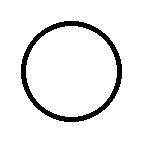

In [74]:
cv2_imshow(img1)

In [14]:
# img1 = cv2.imread("/content/triangle.jpg")

In [75]:
img_train = cv2.imread("/content/circle.jpg")

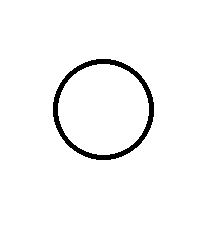

In [76]:
cv2_imshow(img_train)

Поиск ключевых точек и дескрипторов в отдельном окне изображения через расстояние Хэмминга:

In [56]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_train, None)
kp2, des2 = orb.detectAndCompute(img1, None)

In [57]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

In [58]:
final_img = cv2.drawMatches(img_train, kp1, 
                            img1, kp2, matches[:20],None)

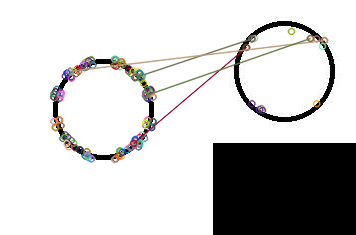

In [59]:
cv2_imshow(final_img)

In [50]:
for m in matches:
  print(m.distance)

28.0
29.0
34.0
41.0


In [51]:
s = 0
for m in matches[0:3]:
  s+=m.distance
print(s)

91.0


In [60]:
for m in matches:
  print(m.distance)

22.0
39.0
47.0
70.0


In [61]:
s = 0
for m in matches[0:4]:
  s+=m.distance
print(s)

178.0


Поиск ключевых точек и дескрипторов в отдельном окне изображения через knn:

In [84]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_train, None)
kp2, des2 = orb.detectAndCompute(img1, None)

In [83]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=3)
#matches = sorted(matches, key = lambda x:x.distance)

In [ ]:
correct_matches = []
for m, n in matches:
  if m.distance < 0.75*n.distance:
    correct_matches.append([m])

In [86]:
final_img = cv2.drawMatches(img_train, kp1, 
                            img1, kp2, matches[:20],None)

error: ignored

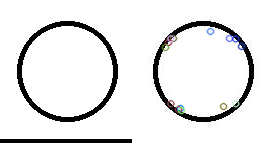

In [214]:
cv2_imshow(final_img)

In [172]:
for m, n in matches:
  print(m, n)

Поиск ключевых точек и дескрипторов на всем изображении:

In [62]:
train_img = cv2.imread('/content/circle.jpg')
test_img = cv2.imread('/content/test_with_triangles.jpg') 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE)
test_img_bw = cv2.cvtColor(test_img, cv2.IMREAD_GRAYSCALE)

In [63]:
orb = cv2.ORB_create()
trainKP, trainDes = orb.detectAndCompute(train_img_bw,None)
testKP, testDes = orb.detectAndCompute(test_img_bw,None)

In [64]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(trainDes,testDes)
matches = sorted(matches, key = lambda x:x.distance)

In [65]:
final_img = cv2.drawMatches(train_img, trainKP, 
                            test_img, testKP, matches,None)
   
# final_img = cv2.resize(final_img, (1000,650))

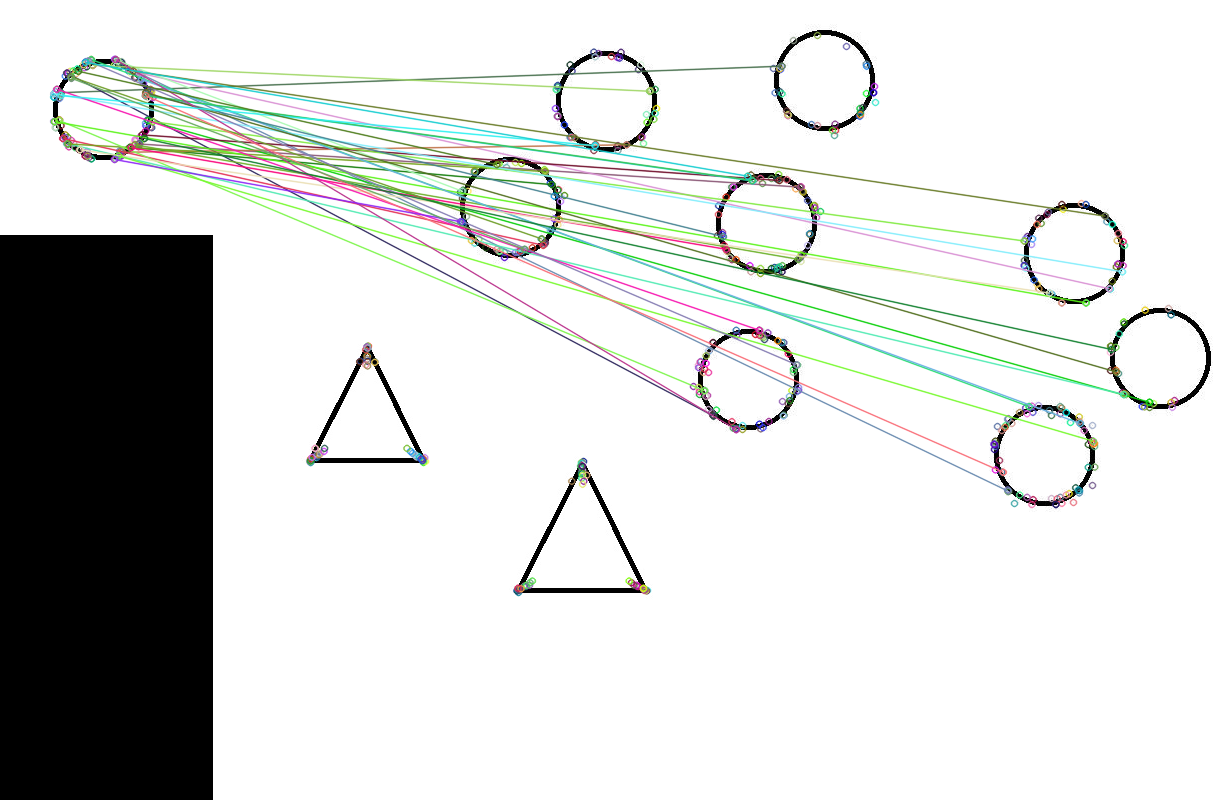

In [66]:
cv2_imshow(final_img)

In [67]:
len(matches)

40